In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## 商品推薦

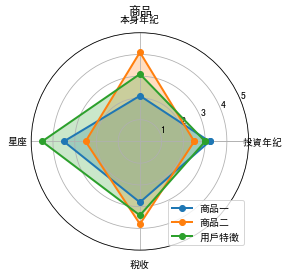

In [2]:
# 雷達圖
# 投資年紀、本身年紀、星座、稅收

# 构造数据
values = [3.2, 2.1, 3.5, 2.8]
values2 = [2.5, 4.1, 2.5, 3.8]
user_features = [3.0, 3.1, 4.5, 3.4]
feature = ['投資年紀', '本身年紀', '星座', '稅收']

N = len(values)
# 设置雷达图的角度，用于平分切开一个圆面
angles=np.linspace(0, 2*np.pi, N, endpoint=False)

# 为了使雷达图一圈封闭起来，需要下面的步骤
values=np.concatenate((values,[values[0]]))
values2 = np.concatenate((values2,[values2[0]]))
values3 = np.concatenate((user_features,[user_features[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 绘图
fig=plt.figure()
# 这里一定要设置为极坐标格式
ax = fig.add_subplot(111, polar=True)

# 绘制折线图
ax.plot(angles, values, 'o-', linewidth=2, label = "商品一")
# 填充颜色
ax.fill(angles, values, alpha=0.25)

# 商品二
ax.plot(angles, values2, 'o-', linewidth=2, label = '商品二')
ax.fill(angles, values2, alpha=0.25)
# 申請者特性
ax.plot(angles, values3, 'o-', linewidth=2, label = '用戶特徵')
ax.fill(angles, values3, alpha=0.25)

# 添加每个特征的标签
ax.set_thetagrids(angles * 180/np.pi, feature)
# 设置雷达图的范围
ax.set_ylim(0, 5)
# 添加标题
plt.title('商品')
# 添加网格线
ax.grid(True)
# 右下標籤
plt.legend(loc='lower right')
# 显示图形
plt.show()

In [3]:
# two norm
user = [3.0, 3.1, 4.5, 3.4]

def recommend_product(user_feature):
    product1 = [3.2, 2.1, 3.5, 2.8]
    product2 = [2.5, 4.1, 2.5, 3.8]
    
    deviation1 = []
    deviation2 = []
    
    print(user_feature)
    
    for i in range(4):
        dev1 = (product1[i] - user_feature[i]) ** 2
        deviation1.append(dev1)
        dev2 = (product2[i] - user_feature[i]) ** 2
        deviation2.append(dev2)
        
    print(deviation1)
    print(deviation2)
    
    similarity1 = sum(deviation1)
    similarity2 = sum(deviation2)
    
    print(similarity1)
    print(similarity2)

    return "product 1" if similarity1 < similarity2 else "product 2"

In [4]:
recommend_product(user)

[3.0, 3.1, 4.5, 3.4]
[0.04000000000000007, 1.0, 1.0, 0.3600000000000001]
[0.25, 0.9999999999999991, 4.0, 0.15999999999999992]
2.4000000000000004
5.409999999999999


'product 1'

## 業務推薦

In [5]:
# age
def age_group(x):
    if x<=20:
        return "20↓" 
    elif x>20 and x<=30:
        return "20-30" 
    elif x>30 and x<=40:
        return "30-40" 
    elif x>40 and x<=50:
        return "40-50"
    elif x>50 and x<=60:
        return "50-60" 
    elif x>60:
        return "60↑"

In [6]:
# area
def city_group(x):
    if x =="None":
        return "None"
    
    city = {
        "North":["台北市", "新北市", "基隆市", "新竹市", "桃園市", "新竹縣"],
        "Center":["台中市", "苗栗縣", "彰化縣", "南投縣", "雲林縣"],
        "South":["高雄市", "台南市", "嘉義市", "嘉義縣", "屏東縣"],
        "East":["宜蘭縣", "花蓮縣", "台東縣"],
        "offshore_islands ":["金門縣", "澎湖縣"]
    }
    
    for area in city:
        if x in city[area]:
            return area

In [7]:
# read data
df = pd.read_csv('../data/Onshore.csv')

# add the number of customers
df["customer_num"] = df['female'] + df['male']

# add recommended score
df["score"] = 0

In [8]:
df

,sales,female,male,20-30,20↓,30-40,40-50,50-60,60↑,highyielddebtriskforecast: N,...,location_新北市,location_新竹市,location_新竹縣,location_桃園市,location_花蓮縣,location_苗栗縣,location_雲林縣,location_高雄市,customer_num,score
0,311710,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,A000159078,2,6,2,4,0,2,0,0,8,...,5,0,0,0,0,0,0,0,8,0
2,A0278,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,A0288,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,A0367,0,3,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,3,0
5,A0431,8,4,3,2,2,1,3,1,10,...,3,1,1,1,0,0,0,1,12,0
6,A0460,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,A0524,11,3,2,0,3,5,3,1,11,...,3,0,1,1,0,0,1,3,14,0
8,A0532,2,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,2,0
9,A0639,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
dic = df.to_dict(orient='records')
dic

[{'sales': '311710',
  'female': 1,
  'male': 0,
  '20-30': 0,
  '20↓': 0,
  '30-40': 0,
  '40-50': 1,
  '50-60': 0,
  '60↑': 0,
  'highyielddebtriskforecast: N': 1,
  'highyielddebtriskforecast: Y': 0,
  'area_Center': 0,
  'area_East': 0,
  'area_North': 1,
  'area_South': 0,
  'location_台中市': 0,
  'location_台北市': 0,
  'location_台南市': 0,
  'location_嘉義市': 0,
  'location_嘉義縣': 0,
  'location_基隆市': 0,
  'location_屏東縣': 0,
  'location_彰化縣': 0,
  'location_新北市': 1,
  'location_新竹市': 0,
  'location_新竹縣': 0,
  'location_桃園市': 0,
  'location_花蓮縣': 0,
  'location_苗栗縣': 0,
  'location_雲林縣': 0,
  'location_高雄市': 0,
  'customer_num': 1,
  'score': 0},
 {'sales': 'A000159078',
  'female': 2,
  'male': 6,
  '20-30': 2,
  '20↓': 4,
  '30-40': 0,
  '40-50': 2,
  '50-60': 0,
  '60↑': 0,
  'highyielddebtriskforecast: N': 8,
  'highyielddebtriskforecast: Y': 0,
  'area_Center': 0,
  'area_East': 0,
  'area_North': 8,
  'area_South': 0,
  'location_台中市': 0,
  'location_台北市': 3,
  'location_台南市': 0,
  '

In [10]:
#age/area/location/gender/risk
age = int(input("age:" ))
gender = input("female/male: ")
city = input("city: ")

age_range = age_group(age)
area = "area_" + city_group(city)
location = "location_" + city
applicant = {"age": age_range, "gender": gender, "area": area, "location": location}

age:24
female/male: male
city: 彰化縣


In [11]:
def recommend_sales(applicant):
    
    print("---------filter by area-----------")
    data_filter_area = []
    for data in dic:
        if data[applicant["area"]] > 0:
            print(data["sales"])
            data_filter_area.append(data)
    
    print("---------filter by age-----------")
    data_filter_age = []
    for data in data_filter_area:
        if data[applicant["age"]] > 0:
            data["score"] += data[applicant["age"]] / data["customer_num"]
            print(data["sales"], data["score"])
            data_filter_age.append(data)
            
    print("---------filter by gender-----------")
    data_filter_gender = []
    for data in data_filter_age:
        if data[applicant["gender"]] > 0:
            data["score"] += (data[applicant["gender"]] / data["customer_num"] * 0.8)
            print(data["sales"], data["score"])
            data_filter_gender.append(data)
            
    print("---------filter by location-----------")
    data_filter_loc = []
    for data in data_filter_age:
        if data[applicant["location"]] > 0:
            data["score"] += (data[applicant["location"]] / data["customer_num"] * 0.6)
            print(data["sales"], data["score"])
            data_filter_loc.append(data)
            
    if len(data_filter_loc) > 0:
        return get_best_sales(data_filter_loc)
    elif len(data_filter_gender) > 0:
        return get_best_sales(data_filter_gender)
    elif len(data_filter_age) > 0:
        return get_best_sales(data_filter_age)
    else:
        return get_best_sales(data_filter_area)
        
def get_best_sales(sales):
    
    best_score = 0
    best_sales_index = 0
    for i in range(len(sales)):
        if sales[i]["score"] > best_score:
            best_score = sales[i]["score"]
            best_sales_index = i
    
    return sales[best_sales_index]["sales"]
        
        
    

In [12]:
best_one = recommend_sales(applicant)

---------filter by area-----------
A0288
A0431
A0524
A0715
A0769
N001809176
N001980909
RCAM1
---------filter by age-----------
A0431 0.25
A0524 0.14285714285714285
A0769 0.16666666666666666
N001809176 1.0
---------filter by gender-----------
A0431 0.5166666666666666
A0524 0.3142857142857143
A0769 0.4666666666666667
---------filter by location-----------
A0524 0.35714285714285715
A0769 0.4916666666666667


In [13]:
best_one

'A0769'